In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout

In [6]:
X_train = np.load("/Users/alirezashoja/Documents/GitHub/fracture-pattern-analysis/data/X_train.npy")
Y_train = np.load("/Users/alirezashoja/Documents/GitHub/fracture-pattern-analysis/data/y_train.npy")
X_test = np.load("/Users/alirezashoja/Documents/GitHub/fracture-pattern-analysis/data/X_test.npy")
Y_test = np.load("/Users/alirezashoja/Documents/GitHub/fracture-pattern-analysis/data/y_test.npy")

print(f"Training data shape: {X_train.shape},{Y_train.shape}")
print(f"Testing data shape: {X_test.shape},{Y_test.shape}")

Training data shape: (1656, 200, 200),(1656,)
Testing data shape: (72, 200, 200),(72,)


In [7]:
# Add channel dimension for grayscale images
X_train = X_train.reshape(X_train.shape[0], 200, 200, 1)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 1)

# Verify the new shapes
print(f"Reshaped Training Data: {X_train.shape}")
print(f"Reshaped Testing Data: {X_test.shape}")

Reshaped Training Data: (1656, 200, 200, 1)
Reshaped Testing Data: (72, 200, 200, 1)


In [28]:
# Build the CNN model
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape = (200,200,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax') # 6 class for 6 categories

])


# Compile the model
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

# print the model summary

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    37,748,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,769,350 (144.08 MB)

 Trainable params: 37,769,350 (144.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model

# Reset weights of the model rrr
for layer in model.layers:
    if hasattr(layer, 'kernel_initializer') and hasattr(layer, 'bias_initializer'):
        layer.kernel.assign(layer.kernel_initializer(tf.shape(layer.kernel)))
        layer.bias.assign(layer.bias_initializer(tf.shape(layer.bias)))

# Train from scratch rrr
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.2374 - loss: 3.1651 - val_accuracy: 0.6250 - val_loss: 1.1337
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - accuracy: 0.5759 - loss: 1.0071 - val_accuracy: 0.7639 - val_loss: 0.6524
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.7716 - loss: 0.6491 - val_accuracy: 0.8194 - val_loss: 0.4944
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.8052 - loss: 0.5301 - val_accuracy: 0.7917 - val_loss: 0.4828
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 339ms/step - accuracy: 0.8565 - loss: 0.4096 - val_accuracy: 0.8056 - val_loss: 0.4974
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 348ms/step - accuracy: 0.8761 - loss: 0.3532 - val_accuracy: 0.8056 - val_loss: 0.5123
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 344ms/step - accuracy: 0.9053 - loss: 0.2871 - val_accuracy: 0.7778 - val_loss: 0.5007
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 351ms/step - accuracy: 0.8672 - loss: 0.3513 - val_accu

In [30]:
# Evaluation of Model
test_loss, test_accuracy = model.evaluate(X_test,Y_test)
print(f"Test Accuracy:{test_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9141 - loss: 0.2515
Test Accuracy:0.88


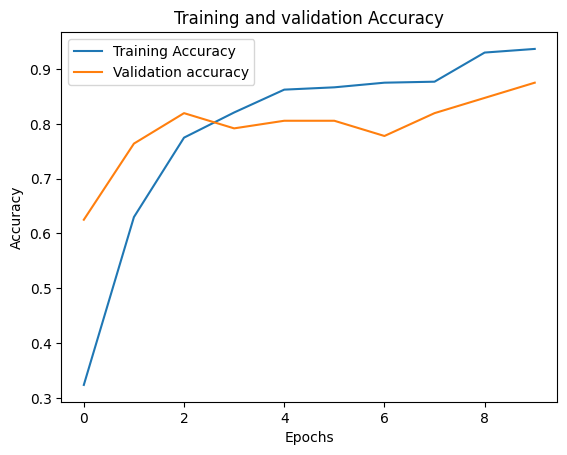

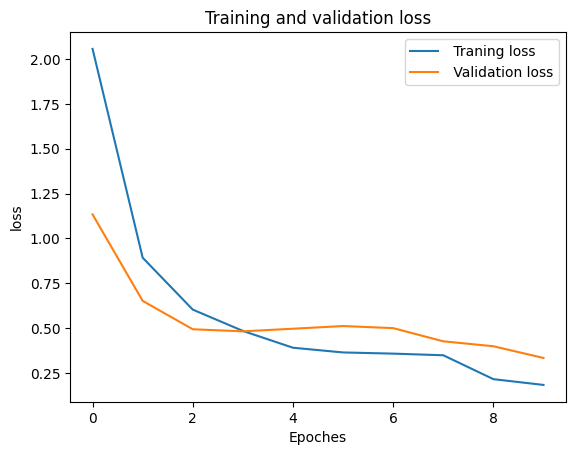

In [31]:
# Plot Training and validation accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation Accuracy')
plt.show()

# Plot traning and validation loss
plt.plot(history.history['loss'], label= " Traning loss")
plt.plot(history.history['val_loss'], label = " Validation loss")
plt.xlabel('Epoches')
plt.ylabel('loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()